<a href="https://colab.research.google.com/github/Kumar7sanu/Uber-Trips-Analysis/blob/main/Uber_Trip_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory data analysis has been performed using Python - NumPy, Pandas, Matplotlib and Seaborn libararies.

## Importing Python libraries

In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from builtins import list
import matplotlib
matplotlib.style.use('ggplot')

import datetime as datetime

%matplotlib inline

### Importing Uber Trips dataset

In [30]:
df = pd.read_csv('/content/My Uber Drives - 2016.csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [31]:
df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [32]:
df.shape

(1156, 7)

There are **1156 rows** and **7 columns** in the dataset.

In [33]:
# Remove uncessary data
df = df[:-1]

In [34]:
# fix data types of data columns

def convert_time(column_name):
    y=[]
    for x in df[column_name]:
        y.append(datetime.datetime.strptime(x, "%m/%d/%Y %H:%M"))

    df[column_name] = y

In [35]:
# fix data types of data columns

def convert_time(column_name):
    y=[]
    for x in df[column_name]:
        y.append(datetime.datetime.strptime(x, "%m/%d/%Y %H:%M"))

    df[column_name] = y

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [37]:
df.size

8085

There are **4571** elements in the dataset.

**Checking for null values**

In [38]:
df.isnull().values.any()

True

In [39]:
for features in df.columns:
  if df[features].isnull().sum()>0:
    print(features)

PURPOSE*


There are null values in the above columns.

In [40]:
df.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [41]:
df.isnull().values.sum()

502

There are **502** null values in the dataset.

**Dropping null values**

In [42]:
df=df.dropna()
df.isnull().values.sum()

0

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  653 non-null    object 
 1   END_DATE*    653 non-null    object 
 2   CATEGORY*    653 non-null    object 
 3   START*       653 non-null    object 
 4   STOP*        653 non-null    object 
 5   MILES*       653 non-null    float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


In the new dataframe there are **653** rows.

**Total number of unique start destinations**

In [44]:
df['START*'].nunique()

131

**Total number of unique stop destinations**

In [45]:
df['STOP*'].nunique()

137

**Uber Trips that has the starting point of San Francisco**

In [46]:
df[df['START*']=='San Francisco']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
362,5/9/2016 14:39,5/9/2016 15:06,Business,San Francisco,Palo Alto,20.5,Between Offices
440,6/14/2016 16:09,6/14/2016 16:39,Business,San Francisco,Emeryville,11.6,Meeting
917,11/7/2016 19:17,11/7/2016 19:57,Business,San Francisco,Berkeley,13.2,Between Offices
919,11/8/2016 12:16,11/8/2016 12:49,Business,San Francisco,Berkeley,11.3,Meeting
927,11/9/2016 18:40,11/9/2016 19:17,Business,San Francisco,Oakland,12.7,Customer Visit
933,11/10/2016 15:17,11/10/2016 15:22,Business,San Francisco,Oakland,9.9,Temporary Site
966,11/15/2016 20:44,11/15/2016 21:00,Business,San Francisco,Berkeley,11.8,Temporary Site


**Most Popular starting point for the Uber drivers**

In [47]:
df['START*'].value_counts().nlargest()

Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
Name: START*, dtype: int64

**Most popular dropping point for the Uber drivers**

In [48]:
df['STOP*'].value_counts().nlargest()

Cary                155
Morrisville          60
Unknown Location     56
Whitebridge          37
Durham               30
Name: STOP*, dtype: int64

**List the most frequent route taken by Uber drivers**

In [49]:
df.groupby(['START*','STOP*']).size().reset_index().head()

,START*,STOP*,0
0,Apex,Cary,10
1,Apex,Holly Springs,1
2,Arabi,Metairie,1
3,Asheville,Topton,1
4,Austin,Katy,1


**Apex** to **Cary** is the most frequent route.

**Types of purposes for the trip**

In [50]:
df['PURPOSE*'].unique()

array(['Meal/Entertain', 'Errand/Supplies', 'Meeting', 'Customer Visit',
       'Temporary Site', 'Between Offices', 'Charity ($)', 'Commute',
       'Moving', 'Airport/Travel'], dtype=object)

**Bar graph of Purposes vs Distance**

<Axes: xlabel='PURPOSE*', ylabel='MILES*'>

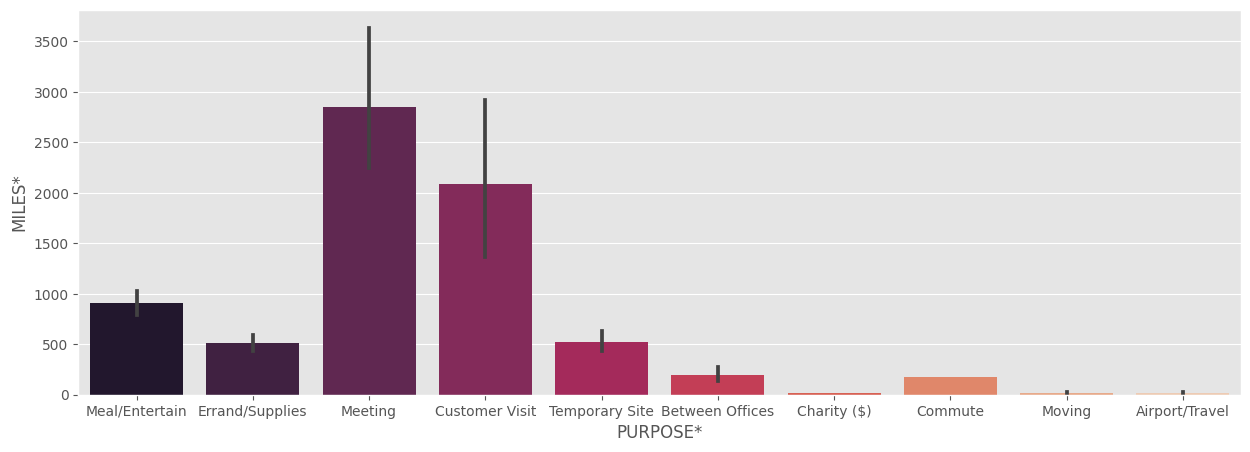

In [51]:
plt.figure(figsize=(15,5))
sns.barplot(x='PURPOSE*', y='MILES*', data=df,palette='rocket',estimator=sum)

**Purposes and the distance travelled for that particular Purpose**

In [52]:
df.groupby('PURPOSE*')['MILES*'].sum().reset_index()

,PURPOSE*,MILES*
0,Airport/Travel,16.5
1,Between Offices,197.0
2,Charity ($),15.1
3,Commute,180.2
4,Customer Visit,2089.5
5,Errand/Supplies,508.0
6,Meal/Entertain,911.7
7,Meeting,2851.3
8,Moving,18.2
9,Temporary Site,523.7


**Number of trips vs Category of Trips**

In [53]:
df['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

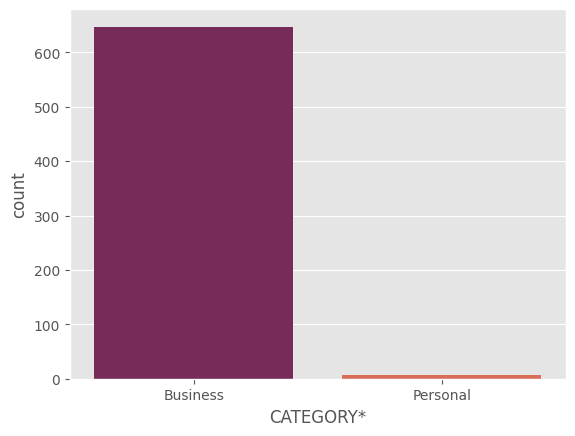

In [54]:
sns.countplot(x='CATEGORY*', data=df,palette='rocket')

**As we notice that the most trips made in business category with huge difference beteewn it and personal category.**

**Proportion of trips that is Business and Personal**

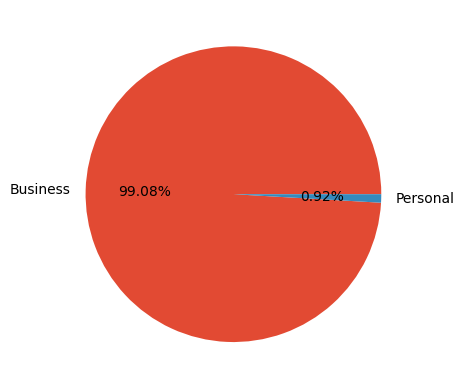

In [57]:
trips=df['CATEGORY*'].unique()
trips_count=df['CATEGORY*'].value_counts().values

plt.pie(trips_count, labels=trips, data=df, autopct='%1.2f%%');

**99.08%** of trips are for **Business** and only **0.92%** for **Personal**